In [11]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [12]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [13]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.RISKFOLIO.value(estimator_type="shrunk")

In [14]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [15]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:05<00:00, 53.23it/s]


StrategyStatistics:
* final_nav = 9.225887
* geom_avg_total_r = 0.123972
* geom_avg_xs_r = 0.116194
* std_xs_r = 0.147878
* min_xs_r = -0.079774
* max_xs_r = 0.102817
* skew = 0.130709
* kurtosis = 13.783898
* max_dd = -0.260782
* sharpe = 0.785742
* alpha_buy_hold = 0.046401
* tracking_error_buy_hold = 0.154187
* ir_buy_hold = 0.300938
* factor_loadings = {'low_risk': 0.5754091546459641, 'momentum': -0.10137222243473851, 'quality': 0.12125269563870358, 'size': 0.03603963718856288, 'value': -0.2151752557369918, 'spx': 0.7089897199189567}
* alpha_benchmark = 0.048967
* alpha_benchmark_pvalue = 0.021399
* tracking_error_benchmark = 0.092072
* ir_benchmark = 0.531829
* ttest_pval = 0.308793
* levene_pval = 0.000000
* timing_ability_coef = -0.021362
* timing_ability_pval = 0.208506

In [16]:
result.std_xs_r, result.sharpe

(0.1478778320696199, 0.7857415957730305)

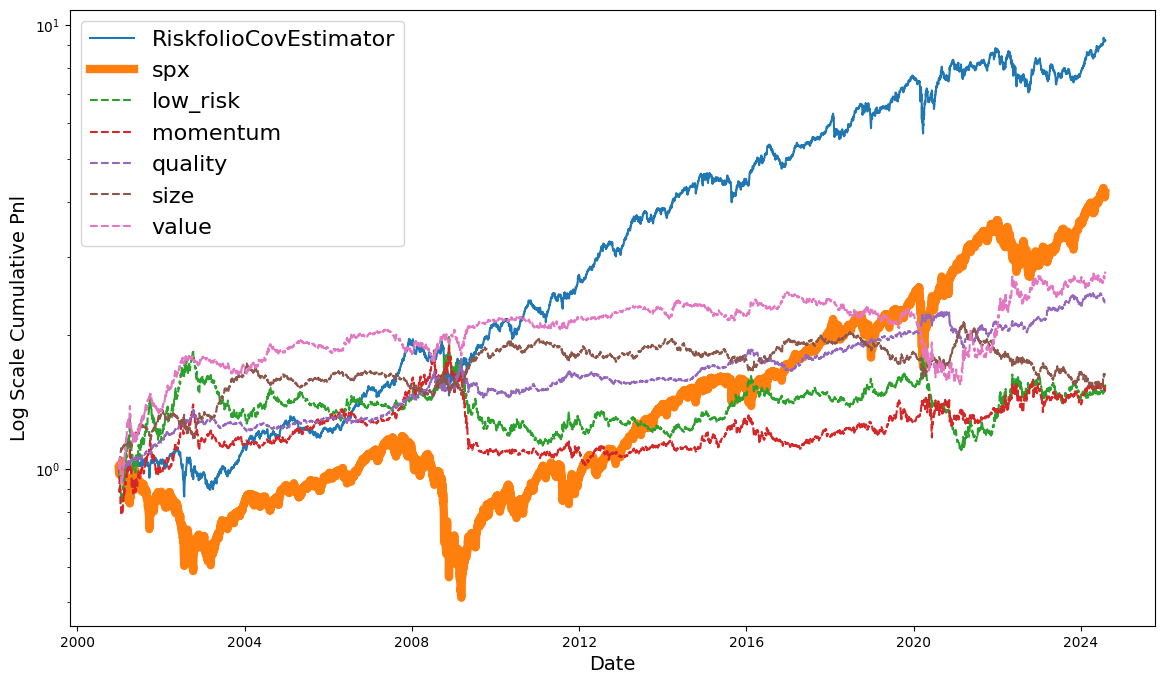

In [17]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

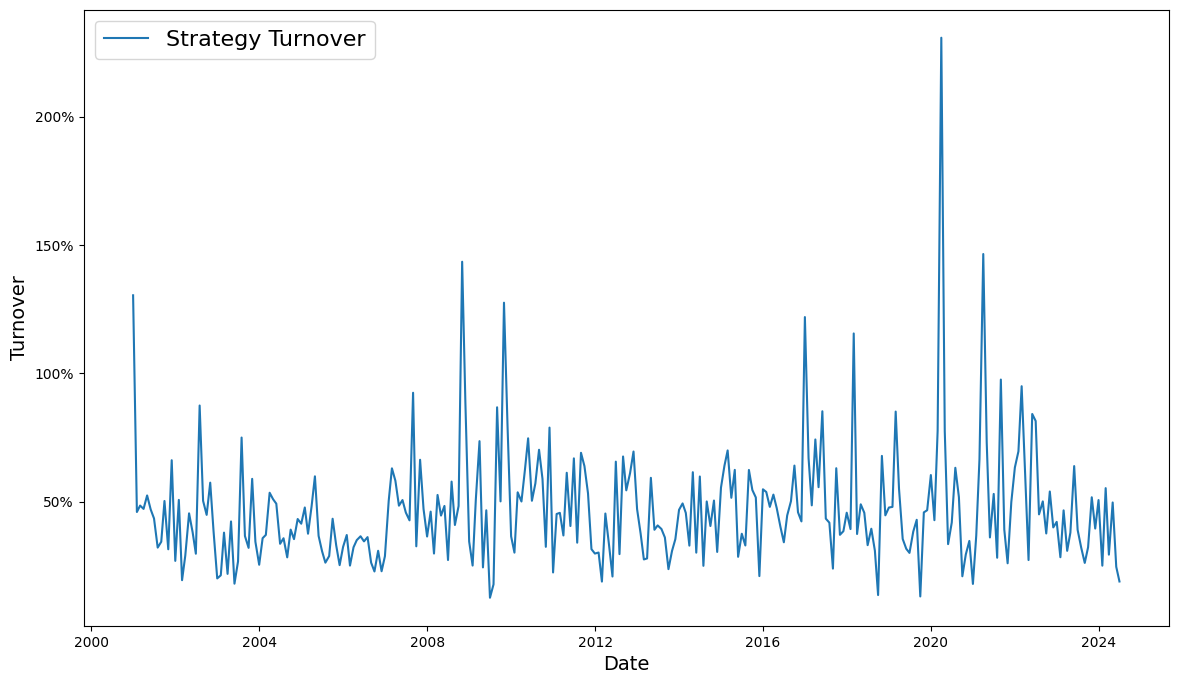

In [18]:
runner.plot_turnover()

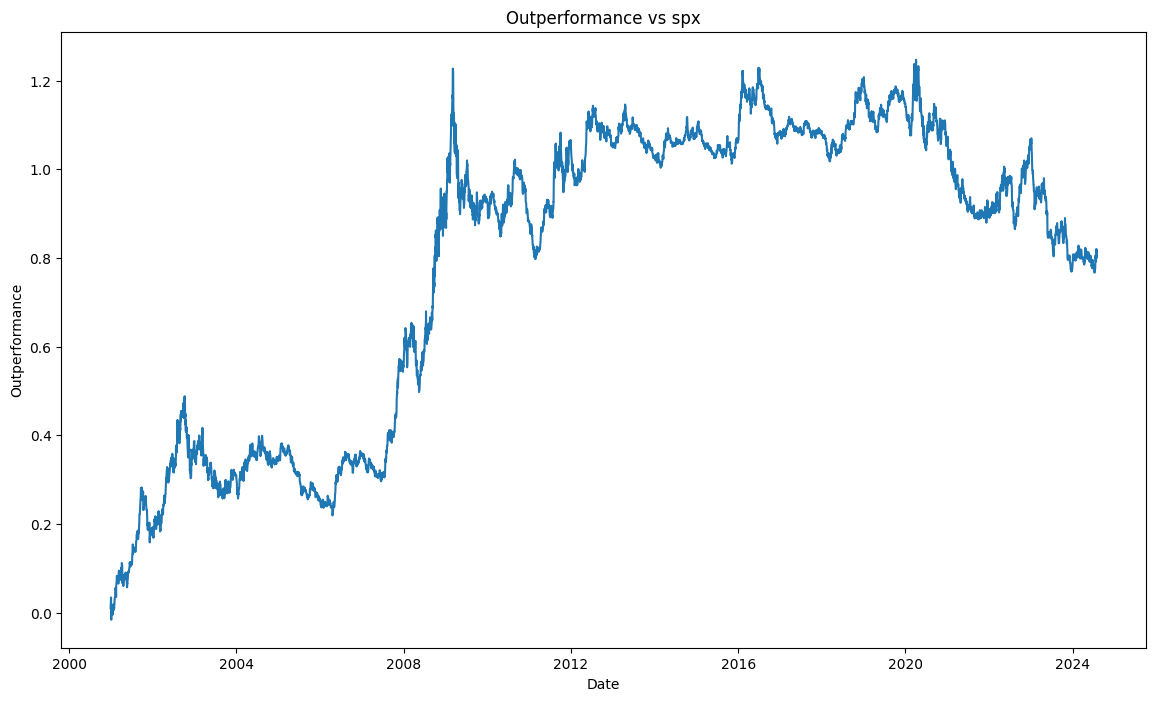

In [19]:
runner.plot_outperformance(mkt_only=True)

In [20]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")